<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/Monte_Carlo_simulation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

添加参数

In [5]:
N1=1000000
N2=250
S=100
a=np.ones(N1)
S0=S*a
T=365/365
t_delta=T/N2
mu=0.1
r=0.1
sigma=0.3
K=100

In [6]:
St=np.zeros((N1,N2))
St[:,0]=S0
St

array([[100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.]])

In [7]:
for i in range(0,N1):
  Epsilon = np.random.normal(0, 1, N2)
  for t in range(1,N2):
    St[i,t]=St[i,t-1]*math.exp((mu-0.5*sigma**2)*t_delta+sigma*math.sqrt(t_delta)*Epsilon[t])

In [8]:
St

array([[100.        , 103.12093859, 106.85055972, ..., 138.01968578,
        139.02119276, 141.10271222],
       [100.        , 102.38681164, 102.17635376, ..., 147.62864321,
        146.11792794, 148.17514469],
       [100.        , 101.50572377,  98.3463667 , ...,  91.53115183,
         92.32385512,  96.00627043],
       ...,
       [100.        ,  96.05895196,  94.51956063, ..., 121.59530302,
        119.81761443, 114.91020006],
       [100.        ,  99.55809603,  99.22608625, ..., 131.4560409 ,
        129.49613408, 129.54221634],
       [100.        , 103.4207869 , 103.45521861, ..., 141.40480248,
        140.51568961, 139.30338266]])

In [9]:
x = np.arange(0,N2,1)
y = St

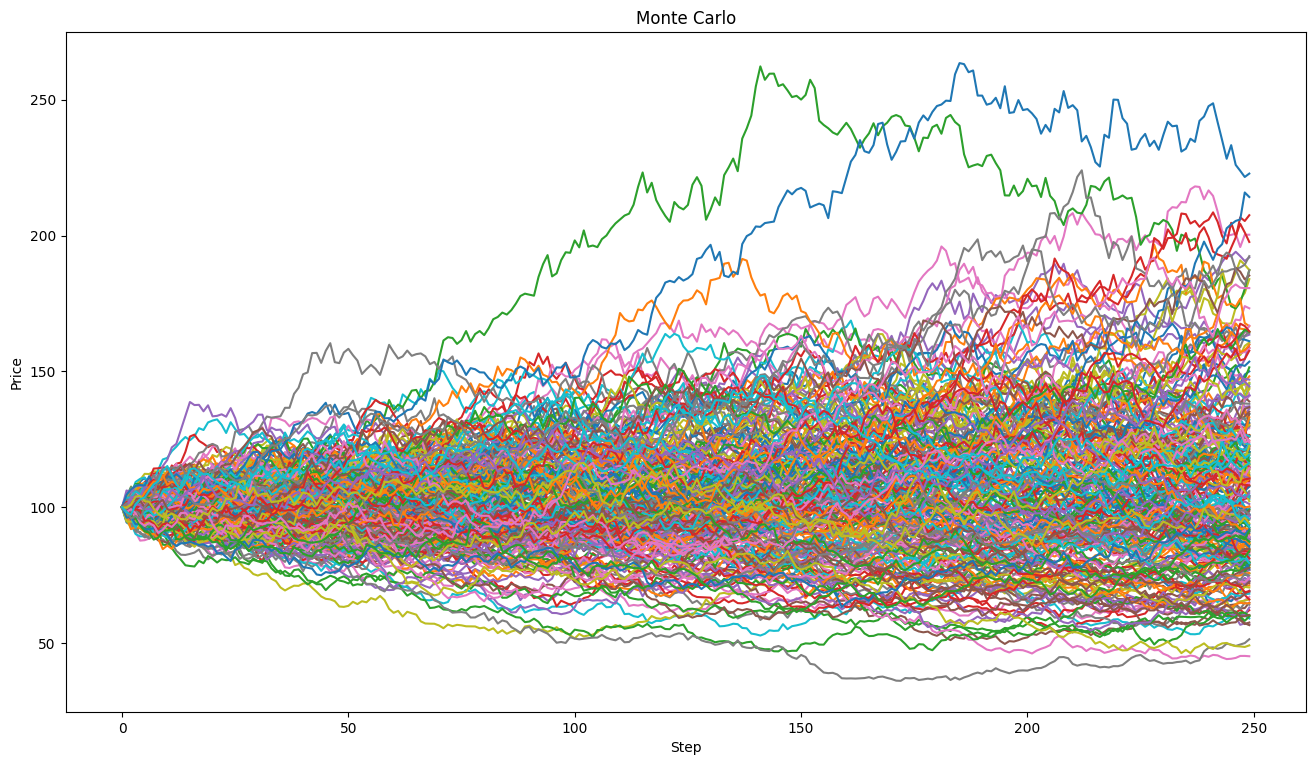

In [10]:
plt.subplots(figsize=(16,9),dpi=100)
for i in range(0,N2):
  plt.plot(x, y[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')

In [11]:
sum=0
for i in range(0,N1):
  sum=sum+max(K-St[i,N2-1],0)
PutMC=sum/N1*math.exp(-r*T)

In [12]:
PutMC

7.195662900936026

In [13]:
sum=0
for i in range(0,N1):
  sum=sum+max(St[i,N2-1]-K,0)
CallMC=sum/N1*math.exp(-r*T)

In [14]:
CallMC

16.702174766008238